In [25]:
from shapely.geometry import shape
import pandas as pd

In [1]:
import json

with open("data/area.geojson") as f:
    geo = json.load(f)

print(geo["features"][0]["properties"])

{'OBJECTID': 6, 'ElSpotOmr': 'NO 2', 'GlobalID': None, 'Shape_Length': 1256473.0667979084, 'Shape_Area': 68759689039.349}


In [5]:
geo.keys()

dict_keys(['type', 'features'])

In [3]:
first = geo['features'][0]

In [4]:
first.keys()

dict_keys(['type', 'id', 'geometry', 'properties'])

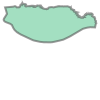

In [19]:
shape(first['geometry'])

In [14]:
first.get("properties")

{'OBJECTID': 6,
 'ElSpotOmr': 'NO 2',
 'GlobalID': None,
 'Shape_Length': 1256473.0667979084,
 'Shape_Area': 68759689039.349}

In [16]:
def build_id_to_name():
    with open("data/area.geojson") as f:
        gj = json.load(f)
    out = {}
    for f in gj.get("features", []):
        fid = f.get("id") or (f.get("properties") or {}).get("id")
        if fid is None:
            continue
        name = (f.get("properties") or {}).get("ElSpotOmr")
        print(name)
        if name:
            out[fid] = str(name)
    return out

id_to_name = build_id_to_name()

NO 2
NO 5
NO 1
NO 3
NO 4


In [13]:
id_to_name

{6: 'NO 2', 7: 'NO 5', 8: 'NO 1', 9: 'NO 3', 10: 'NO 4'}

In [20]:
with open("data/area.geojson") as f:
        gj = json.load(f)
geojson_data = gj
polys = []
for feat in geojson_data.get("features", []):
    fid = feat.get("id") or (f.get("properties") or {}).get("id")
    if not fid:
        continue
    try:
        geom = shape(feat["geometry"])
    except Exception:
        continue
    polys.append((fid, geom))

In [21]:
polys

[(6,
  <POLYGON ((5.741 60.352, 5.74 60.354, 5.74 60.351, 5.74 60.349, 5.74 60.349,...>),
 (7,
  <POLYGON ((7.415 61.855, 7.413 61.858, 7.403 61.856, 7.391 61.854, 7.382 61....>),
 (8,
  <POLYGON ((11.809 62.829, 11.808 62.829, 11.803 62.829, 11.799 62.829, 11.79...>),
 (9,
  <POLYGON ((10.874 65.42, 10.578 65.47, 10.473 65.369, 10.452 65.348, 10.366 ...>),
 (10,
  <POLYGON ((28.336 71.294, 28.318 71.296, 28.3 71.297, 27.984 71.317, 27.976 ...>)]

In [22]:
basic_data = {
        "city": ["Oslo", "Kristiansand", "Trondheim", "Tromsø", "Bergen"],
        "price_area_code": ["NO1", "NO2", "NO3", "NO4", "NO5"],
        "latitude": [59.9127, 58.1467, 63.4305, 69.6489, 60.393],
        "longitude": [10.7461, 7.9956, 10.3951, 18.9551, 5.3242],
    }

In [38]:
basic_info = pd.DataFrame(basic_data)

In [39]:
basic_info

,city,price_area_code,latitude,longitude
0,Oslo,NO1,59.9127,10.7461
1,Kristiansand,NO2,58.1467,7.9956
2,Trondheim,NO3,63.4305,10.3951
3,Tromsø,NO4,69.6489,18.9551
4,Bergen,NO5,60.3930,5.3242


In [40]:
basic_info[basic_info['price_area_code'] == 'NO3'][['latitude','longitude']].values[0][0]

np.float64(63.4305)

In [42]:
lat, lon = basic_info[basic_info['price_area_code'] == 'NO1'][['latitude','longitude']].values[0]

In [43]:
lat

np.float64(59.9127)